In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from aicsimageio import AICSImage
import pyvips
import os, time
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = "/raid/mpsych/AXOLOTL"
SCAN = "MRE11_30 LFL Slide 2(1).czi"
SHORT_SCAN = "MRE11_30"

OUTPUT_DIR = "web/" + SHORT_SCAN

In [4]:
img = AICSImage(os.path.join(DATA_DIR, SCAN))

In [5]:
slices = []
for i, s in enumerate(img.scenes):
    t0 = time.time()

    stack = img.get_stack(select_scenes=[i])
    print("Shape of stack:", stack.shape)  # Print the shape of the stack
    
    # Extract the blue and green channels
    blue_channel = stack[0, 0, 0, 0, :, :].astype(float)
    green_channel = stack[0, 0, 1, 0, :, :].astype(float)
    
    # Apply the conditions for the blue and green channels
    blue_channel[blue_channel <= 77] = 0 # Set values below 77 to 0
    green_channel[green_channel <= 144] = 0  # Set values below 144 to 0
    
    # Scale the values to the range [0, 255]
    blue_channel = (blue_channel / blue_channel.max()) * 255
    green_channel = (green_channel / green_channel.max()) * 255
    
    # Convert to uint8
    blue_channel = blue_channel.astype(np.uint8)
    green_channel = green_channel.astype(np.uint8)
    
    # Create a new array with only blue and green channels
    arr = np.stack((green_channel, blue_channel), axis=-1)
    slices.append(arr)
    
    print('Done loading scene', i, 'after', time.time() - t0)


Shape of stack: (1, 1, 2, 1, 57344, 38912)
Done loading scene 0 after 113.19162940979004


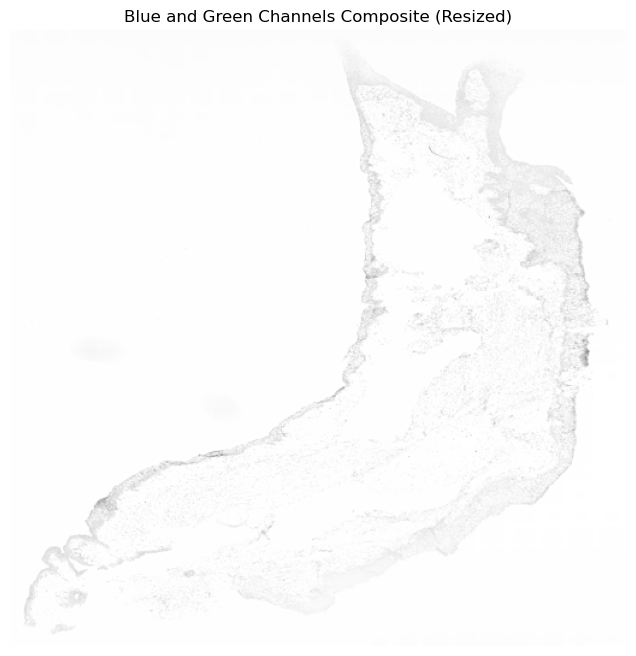

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Create a composite image with blue and green channels
composite_image = slices[0][:, :, [1, 0]]  # Select blue and green channels, and reverse their order

# Convert the composite image to a Pillow image
pil_image = Image.fromarray(composite_image)

# Resize the image for display
resized_image = pil_image.resize((512, 512))  # Adjust the dimensions as needed

# Display the resized image
plt.figure(figsize=(8, 8))
plt.imshow(resized_image)
plt.title('Blue and Green Channels Composite (Resized)')
plt.axis('off')
plt.show()

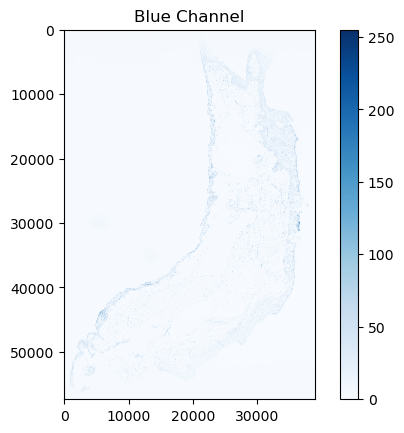

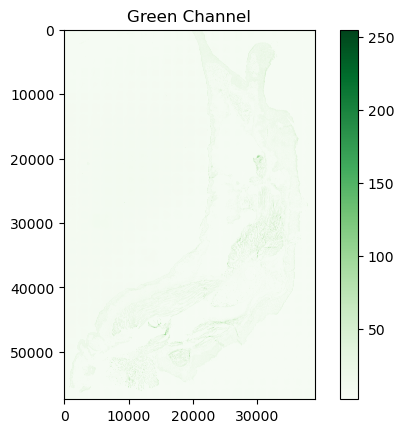

In [7]:
# Display the blue channel
plt.imshow(slices[0][:, :, 0], cmap='Blues')
plt.title('Blue Channel')
plt.colorbar()
plt.show()

# Display the green channel
plt.imshow(slices[0][:, :, 1], cmap='Greens')
plt.title('Green Channel')
plt.colorbar()
plt.show()


In [9]:
for i,s in enumerate(slices):
    t0 = time.time()
    vips_img = pyvips.Image.new_from_array(s)
    vips_img.dzsave(OUTPUT_DIR+'_'+str(i))
    print('Done converting scene', i, 'after', time.time()-t0)

Done converting scene 0 after 9.871216535568237
Done converting scene 1 after 8.438585042953491
Done converting scene 2 after 9.26169204711914
Done converting scene 3 after 8.57879376411438
